# NFL Data Analysis 

 The NFL Draft is an annual event where teams select players from a pool of athletes who have completed at least three post-high school years. The draft consists of seven rounds, and the order in each round is determined by the performance of the teams in the previous year, with weaker teams picking earlier. Teams have the option to trade draft picks for other picks or players.

The NFL Scouting Combine is also held annually in Indianapolis, IN. It brings together eligible athletes for the NFL Draft to undergo physical and psychological tests, evaluated by NFL team representatives. The combine serves as a platform for teams and agents to negotiate and potentially finalize deals.



# Web scraping wiht python

In [1]:
# The following is the code for importing libraries and web scraping  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula as smf
import numpy as np

C:\Users\Shgol\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# url 
url = "https://www.pro-football-reference.com/years/2022/draft.htm"

In [4]:

draft_py = pd.read_html(url, header =1)[0]
draft_py.loc[draft_py["DrAV"].isnull(), "DrAV"] = 0

In [5]:
draft_py

,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,...,Yds.1,TD.1,Rec,Yds.2,TD.2,Solo,Int.1,Sk,College/Univ,Unnamed: 28
0,1,1,JAX,Travon Walker,DE,21,2022,0,0,1,...,0,0,0,0,0,24,1,3.5,Georgia,College Stats
1,1,2,DET,Aidan Hutchinson,DE,22,2022,0,0,1,...,0,0,0,0,0,34,3,9.5,Michigan,College Stats
2,1,3,HOU,Derek Stingley Jr.,CB,21,2022,0,0,1,...,0,0,0,0,0,35,1,1.0,LSU,College Stats
3,1,4,NYJ,Sauce Gardner,CB,22,2022,1,1,1,...,0,0,0,0,0,51,2,NaN,Cincinnati,College Stats
4,1,5,NYG,Kayvon Thibodeaux,DE,21,2022,0,0,1,...,0,0,0,0,0,33,NaN,4.0,Oregon,College Stats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,7,258,GNB,Samori Toure,WR,24,2022,0,0,0,...,0,0,5,82,1,NaN,NaN,NaN,Nebraska,College Stats
264,7,259,KAN,Nazeeh Johnson,SAF,24,2022,0,0,0,...,0,0,0,0,0,5,NaN,NaN,Marshall,College Stats
265,7,260,LAC,Zander Horvath,RB,23,2022,0,0,0,...,8,0,5,8,2,1,NaN,NaN,Purdue,College Stats
266,7,261,LAR,AJ Arcuri,OT,25,2022,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,Michigan St.,College Stats


In [6]:
print(draft_py)

    Rnd Pick   Tm              Player  Pos Age    To AP1 PB St  ... Yds.1  \
0     1    1  JAX       Travon Walker   DE  21  2022   0  0  1  ...     0   
1     1    2  DET    Aidan Hutchinson   DE  22  2022   0  0  1  ...     0   
2     1    3  HOU  Derek Stingley Jr.   CB  21  2022   0  0  1  ...     0   
3     1    4  NYJ       Sauce Gardner   CB  22  2022   1  1  1  ...     0   
4     1    5  NYG   Kayvon Thibodeaux   DE  21  2022   0  0  1  ...     0   
..   ..  ...  ...                 ...  ...  ..   ...  .. .. ..  ...   ...   
263   7  258  GNB        Samori Toure   WR  24  2022   0  0  0  ...     0   
264   7  259  KAN      Nazeeh Johnson  SAF  24  2022   0  0  0  ...     0   
265   7  260  LAC      Zander Horvath   RB  23  2022   0  0  0  ...     8   
266   7  261  LAR           AJ Arcuri   OT  25  2022   0  0  0  ...     0   
267   7  262  SFO         Brock Purdy   QB  22  2022   0  0  0  ...    13   

    TD.1 Rec Yds.2 TD.2 Solo Int.1   Sk  College/Univ    Unnamed: 28  
0   

In [7]:
# Looping over each seasons to import data from web 

In [2]:
## Python
draft_py = pd.DataFrame()
for i in range(2000, 2022 + 1):                                     # looping the different seasons 
    url = "https://www.pro-football-reference.com/years/" + \
           str(i) + \
           "/draft.htm"
    web_data = pd.read_html(url, header=1)[0]
    web_data["Season"] = i
    web_data = web_data.query('Tm != "Tm"')                       #   rows name is not column's name
    draft_py = pd.concat([draft_py, web_data])

draft_py.reset_index(drop=True, inplace=True)

Some teams changed their location over the last 2 decades. 

In [3]:
# some teams moved cities over the past decades

# chargers << Los ANgels from　San Diego 
# Raiders << Oakland to Las Vegas 
# Rams Los Angels from St.Louis


# team names need to be changed to reflect the new names
conditions = [
    (draft_py.Tm == "SDG"),
    (draft_py.Tm == "OAK"),
    (draft_py.Tm == "STL"),
]
choices = ["LAC", "LVR", "LAR"]

draft_py["Tm"] = \
    np.select(conditions, choices, default = draft_py.Tm)

In [4]:
draft_py

,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,...,TD.1,Rec,Yds.2,TD.2,Solo,Int.1,Sk,College/Univ,Unnamed: 28,Season
0,1,1,CLE,Courtney Brown,DE,22,2005,0,0,4,...,0,0,0,0,156,NaN,19.0,Penn St.,College Stats,2000
1,1,2,WAS,LaVar Arrington,LB,22,2006,0,3,5,...,0,0,0,0,338,3,23.5,Penn St.,College Stats,2000
2,1,3,WAS,Chris Samuels,T,23,2009,0,6,9,...,0,0,0,0,NaN,NaN,NaN,Alabama,College Stats,2000
3,1,4,CIN,Peter Warrick,WR,23,2005,0,0,4,...,2,275,2991,18,3,NaN,NaN,Florida St.,College Stats,2000
4,1,5,BAL,Jamal Lewis,RB,21,2009,1,1,9,...,58,221,1879,4,NaN,NaN,NaN,Tennessee,College Stats,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5866,7,258,GNB,Samori Toure,WR,24,2022,0,0,0,...,0,5,82,1,NaN,NaN,NaN,Nebraska,College Stats,2022
5867,7,259,KAN,Nazeeh Johnson,SAF,24,2022,0,0,0,...,0,0,0,0,5,NaN,NaN,Marshall,College Stats,2022
5868,7,260,LAC,Zander Horvath,RB,23,2022,0,0,0,...,0,5,8,2,1,NaN,NaN,Purdue,College Stats,2022
5869,7,261,LAR,AJ Arcuri,OT,25,2022,0,0,0,...,0,0,0,0,NaN,NaN,NaN,Michigan St.,College Stats,2022


In [5]:
# replace missing draft apporoximates values with 0 
draft_py.loc[draft_py["DrAV"].isnull(), "DrAV"] = 0 
draft_py.to_csv("data_py.csv", index = False)

In [55]:
print(draft_py.head())

  Rnd Pick   Tm           Player Pos Age    To AP1 PB St  ... TD.1  Rec Yds.2  \
0   1    1  CLE   Courtney Brown  DE  22  2005   0  0  4  ...    0    0     0   
1   1    2  WAS  LaVar Arrington  LB  22  2006   0  3  5  ...    0    0     0   
2   1    3  WAS    Chris Samuels   T  23  2009   0  6  9  ...    0    0     0   
3   1    4  CIN    Peter Warrick  WR  23  2005   0  0  4  ...    2  275  2991   
4   1    5  BAL      Jamal Lewis  RB  21  2009   1  1  9  ...   58  221  1879   

  TD.2 Solo Int.1    Sk College/Univ    Unnamed: 28 Season  
0    0  156   NaN  19.0     Penn St.  College Stats   2000  
1    0  338     3  23.5     Penn St.  College Stats   2000  
2    0  NaN   NaN   NaN      Alabama  College Stats   2000  
3   18    3   NaN   NaN  Florida St.  College Stats   2000  
4    4  NaN   NaN   NaN    Tennessee  College Stats   2000  

[5 rows x 30 columns]


In [56]:
print(draft_py.columns)

Index(['Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'Age', 'To', 'AP1', 'PB', 'St',
       'wAV', 'DrAV', 'G', 'Cmp', 'Att', 'Yds', 'TD', 'Int', 'Att.1', 'Yds.1',
       'TD.1', 'Rec', 'Yds.2', 'TD.2', 'Solo', 'Int.1', 'Sk', 'College/Univ',
       'Unnamed: 28', 'Season'],
      dtype='object')


In [57]:
# The followings are the columns which I am interested in analysing . 
# Season - the season in which players eas drafted
# Pick - Which Selection 
# Tm - the player's drafting team 
# Player - players name 
# Pos - position 
# wAv - the player's whole career approximate value 
# DrAV  - approximate value for drafting team 

In [6]:
# select the certain column 
draft_py_use = draft_py[["Season", "Pick", "Tm", "Player", "Pos", "wAV", "DrAV"]]

print(draft_py_use)

      Season Pick   Tm           Player  Pos wAV DrAV
0       2000    1  CLE   Courtney Brown   DE  27   21
1       2000    2  WAS  LaVar Arrington   LB  46   45
2       2000    3  WAS    Chris Samuels    T  63   63
3       2000    4  CIN    Peter Warrick   WR  27   25
4       2000    5  BAL      Jamal Lewis   RB  69   53
...      ...  ...  ...              ...  ...  ..  ...
5866    2022  258  GNB     Samori Toure   WR   1    1
5867    2022  259  KAN   Nazeeh Johnson  SAF   1    1
5868    2022  260  LAC   Zander Horvath   RB   0    0
5869    2022  261  LAR        AJ Arcuri   OT   1    1
5870    2022  262  SFO      Brock Purdy   QB   6    6

[5871 rows x 7 columns]


# Analyzing the NFL Draft 


The NFL Draft is an annual event that allows teams to select eligible players. It originated in 1936 as a means to promote competitive balance and provide teams with talented players. During the draft, each team is allocated one pick per round. The order of selection in each round is determined by a team's record, with tie-breaking rules in place for teams with the same record. Consequently, the team that won the Super Bowl picks last, while the runner-up picks second-to-last. However, teams often engage in player trades and include draft picks as part of these transactions, which adds extra value to the picks. 

There are intriguing questions that arise from the draft, particularly for those involved in drafting players for fantasy teams or actual NFL teams. For instance, determining the value of each draft pick and in what denomination it holds significance. This valuation is important because teams frequently trade picks with one another to align their draft selections with their immediate needs.




In [9]:
# Average draft value
draft_py_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5871 entries, 0 to 5870
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Season  5871 non-null   int64 
 1   Pick    5871 non-null   object
 2   Tm      5871 non-null   object
 3   Player  5871 non-null   object
 4   Pos     5871 non-null   object
 5   wAV     5319 non-null   object
 6   DrAV    5871 non-null   object
dtypes: int64(1), object(6)
memory usage: 321.2+ KB


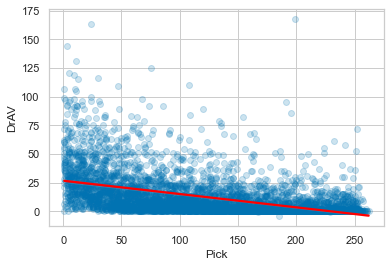

In [10]:

sns.set_theme(style="whitegrid", palette="colorblind")

draft_py_use_pre2019 = draft_py_use.query("Season <= 2019")

## format columns as numeric or integers
draft_py_use_pre2019 = draft_py_use_pre2019.astype({"Pick": int, "DrAV": float})

sns.regplot(data=draft_py_use_pre2019,
            x="Pick",
            y="DrAV",
            line_kws={"color": "red"},
            scatter_kws={'alpha':0.2});
plt.show();


In [17]:
# first calculate the average value for each pick , 
# also include 6 before and 6 after data , for a window of 13 

In [18]:
draft_chart_py = draft_py_use_pre2019.groupby(["Pick"]).agg({"DrAV": ["mean"]})

In [19]:
draft_chart_py

,DrAV
,mean
Pick,
1,47.60
2,39.85
3,44.45
4,31.15
5,43.65
...,...
258,0.00
259,0.00


In [20]:
draft_chart_py.columns = list(map("_".join, draft_chart_py.columns))


In [21]:
draft_chart_py

,DrAV_mean
Pick,
1,47.60
2,39.85
3,44.45
4,31.15
5,43.65
...,...
258,0.00
259,0.00
260,1.00


In [26]:
draft_chart_py.loc[draft_chart_py.DrAV_mean.isnull()] = 0

# rolling average :  for value not to be less affected by reallly good pick in a later round
# there sometimes exists really good players in later pick , like Tom Brady 
draft_chart_py["roll_DrAV"] = (
    draft_chart_py["DrAV_mean"]
    .rolling(window=13, min_periods=1, center=True)
    .mean()
)

In [27]:
draft_chart_py

,DrAV_mean,roll_DrAV
Pick,,
1,47.60,38.950000
2,39.85,37.575000
3,44.45,37.883333
4,31.15,36.990000
5,43.65,37.627273
...,...,...
258,0.00,1.646677
259,0.00,1.295556
260,1.00,1.155556


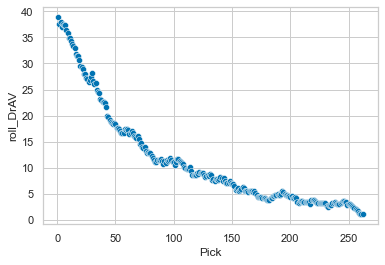

In [28]:
# visualize the result 
sns.scatterplot(data = draft_chart_py, x="Pick", y="roll_DrAV")
plt.show()

In [29]:
# reset_index 
draft_chart_py.reset_index(inplace = True)

In [30]:
draft_chart_py

,Pick,DrAV_mean,roll_DrAV
0,1,47.60,38.950000
1,2,39.85,37.575000
2,3,44.45,37.883333
3,4,31.15,36.990000
4,5,43.65,37.627273
...,...,...,...
257,258,0.00,1.646677
258,259,0.00,1.295556
259,260,1.00,1.155556
260,261,0.00,1.083333


In [32]:
draft_chart_py.skew()

Pick         0.000000
DrAV_mean    1.420635
roll_DrAV    1.294235
dtype: float64

In [36]:
# before running regression analysis it is important to fix the skewness 
# in order to get a better result in linear regression  , logarithm transformation is needed
draft_chart_py["roll_DrAV_log"] = np.log(draft_chart_py["roll_DrAV"] + 1)

In [37]:
import statsmodels.formula.api as smf

# each pick value regressed by Pick      
DrAV_pick_fit_py = smf.ols(formula="roll_DrAV_log ~ Pick", data=draft_chart_py).fit()


In [38]:
print(DrAV_pick_fit_py.summary())

                            OLS Regression Results                            
Dep. Variable:          roll_DrAV_log   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     8497.
Date:                Tue, 18 Jul 2023   Prob (F-statistic):          1.38e-200
Time:                        01:21:12   Log-Likelihood:                 177.05
No. Observations:                 262   AIC:                            -350.1
Df Residuals:                     260   BIC:                            -343.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4871      0.015    227.712      0.0

In [39]:
# transform - backing using an exponential function
draft_chart_py["fitted_DrAV"] = np.exp(DrAV_pick_fit_py.predict()) -1 

In [40]:
draft_chart_py.head()

,Pick,DrAV_mean,roll_DrAV,roll_DrAV_log,fitted_DrAV
0,1,47.60,38.950000,3.687629,31.386918
1,2,39.85,37.575000,3.652604,31.086948
2,3,44.45,37.883333,3.660566,30.789757
3,4,31.15,36.990000,3.637323,30.495318
4,5,43.65,37.627273,3.653959,30.203606


# Teams better at Drafting Players than Others

 The question of whether certain teams excel at drafting compared to others is challenging due to the assignment of draft picks. Stronger teams typically choose later in each round, and as previously discussed, more talented players are typically selected earlier. This scenario could lead to a misconception where we wrongly assume that weaker teams are superior drafters and vice versa. To address this, it is necessary to adjust expectations for each pick using the previously constructed model.
 
 Taking the std and average of the difference between DrAV and fitted_DrAV
    

In [42]:
# information before 2019
draft_py_use_pre2019

,Season,Pick,Tm,Player,Pos,wAV,DrAV
0,2000,1,CLE,Courtney Brown,DE,27,21.0
1,2000,2,WAS,LaVar Arrington,LB,46,45.0
2,2000,3,WAS,Chris Samuels,T,63,63.0
3,2000,4,CIN,Peter Warrick,WR,27,25.0
4,2000,5,BAL,Jamal Lewis,RB,69,53.0
...,...,...,...,...,...,...,...
5090,2019,250,MIN,Austin Cutting,LS,1,1.0
5091,2019,251,LAR,Dakota Allen,LB,2,0.0
5092,2019,252,NWE,Ken Webster,CB,3,0.0
5093,2019,253,WAS,Jordan Brailford,DE,1,0.0


In [43]:
# the chart including informarion , each pick and corresponding value , expeccted value
draft_chart_py

,Pick,DrAV_mean,roll_DrAV,roll_DrAV_log,fitted_DrAV
0,1,47.60,38.950000,3.687629,31.386918
1,2,39.85,37.575000,3.652604,31.086948
2,3,44.45,37.883333,3.660566,30.789757
3,4,31.15,36.990000,3.637323,30.495318
4,5,43.65,37.627273,3.653959,30.203606
...,...,...,...,...,...
257,258,0.00,1.646677,0.973305,1.963325
258,259,0.00,1.295556,0.830975,1.935879
259,260,1.00,1.155556,0.768048,1.908686
260,261,0.00,1.083333,0.733969,1.881746


In [44]:
# merge 2 datasets 
draft_py_use_pre2019 = draft_py_use_pre2019.merge(draft_chart_py[["Pick", "fitted_DrAV"]],on="Pick")
draft_py_use_pre2019

,Season,Pick,Tm,Player,Pos,wAV,DrAV,fitted_DrAV
0,2000,1,CLE,Courtney Brown,DE,27,21.0,31.386918
1,2001,1,ATL,Michael Vick,QB,92,60.0,31.386918
2,2002,1,HOU,David Carr,QB,45,42.0,31.386918
3,2003,1,CIN,Carson Palmer,QB,107,60.0,31.386918
4,2004,1,LAC,Eli Manning,QB,121,0.0,31.386918
...,...,...,...,...,...,...,...,...
5090,2002,260,BUF,Dominique Stevenson,LB,2,2.0,1.908686
5091,2003,260,DET,Travis Anglin,WR,NaN,0.0,1.908686
5092,2002,261,HOU,Ahmad Miller,DT,NaN,0.0,1.881746
5093,2003,261,CHI,Bryan Anderson,G,0,0.0,1.881746


In [46]:
# taking the difference between actual value and predicted value
# erorr
draft_py_use_pre2019["OE"] = (
    draft_py_use_pre2019["DrAV"] -
    draft_py_use_pre2019["fitted_DrAV"]
)


In [47]:
#  Group by each team 
 #  over OE for mean, std, count
 # sort values according to mean in desceding order
draft_py_use_pre2019.groupby("Tm").agg({"OE": ["count", "mean", "std"]}).reset_index().sort_values([("OE", "mean")], ascending=False) 

Tm    OE                     
        count      mean        std
26  PIT   161  3.523873  18.878551
11  GNB   180  3.371433  20.063320
8   DAL   160  2.461129  16.620351
1   ATL   148  2.291654  16.124529
21  NOR   131  2.263655  18.036746
22  NWE   176  2.162438  20.822443
13  IND   162  1.852253  15.757658
4   CAR   148  1.842573  16.510813
2   BAL   170  1.721930  16.893993
27  SEA   181  1.480825  16.950089
16  LAC   144  1.393089  14.608528
5   CHI   149  0.672094  16.052031
20  MIN   167  0.544533  13.986365
15  KAN   154  0.501463  15.019527
25  PHI   162  0.472632  15.351785
6   CIN   176  0.466203  15.812953
14  JAX   158  0.182685  13.111672
30  TEN   172  0.128566  12.662670
12  HOU   145 -0.075827  12.978999
28  SFO   184 -0.092089  13.449491
31  WAS   150 -0.450485   9.951758
24  NYJ   137 -0.534640  13.317478
0   ARI   149 -0.601563  14.295335
23  NYG   145 -0.879900  12.471611
29  TAM   153 -0.922181  11.409698
3   BUF   161 -0.985761  12.458855
17  LAR   175 -1.439527  11.985219
19  MIA   151 -1.486282  10.470145
9   DEN   159 -1.491545  12.594449
10  DET   155 -1.765868  12.061696
18  LVR   162 -2.587423  10.217426
7   CLE   170 -3.557266  10.336729

One reason why we added the standard deviation to this table is so that we could easily compute the standard error for each team. 

 Pitttsburgh Steelers , Green Bay Packers , Dallas Cowboys are above the mean 

In [82]:
draft_py_use_pre2019 = draft_py_use_pre2019.merge(draft_chart_py[["Pick", "fitted_DrAV"]],on="Pick")


In [83]:
draft_py_use_pre2019

,Season,Pick,Tm,Player,Pos,wAV,DrAV,fitted_DrAV_x,OE,fitted_DrAV_y
0,2000,1,CLE,Courtney Brown,DE,27,21.0,31.386918,-10.386918,31.386918
1,2001,1,ATL,Michael Vick,QB,92,60.0,31.386918,28.613082,31.386918
2,2002,1,HOU,David Carr,QB,45,42.0,31.386918,10.613082,31.386918
3,2003,1,CIN,Carson Palmer,QB,107,60.0,31.386918,28.613082,31.386918
4,2004,1,LAC,Eli Manning,QB,121,0.0,31.386918,-31.386918,31.386918
...,...,...,...,...,...,...,...,...,...,...
5090,2002,260,BUF,Dominique Stevenson,LB,2,2.0,1.908686,0.091314,1.908686
5091,2003,260,DET,Travis Anglin,WR,NaN,0.0,1.908686,-1.908686,1.908686
5092,2002,261,HOU,Ahmad Miller,DT,NaN,0.0,1.881746,-1.881746,1.881746
5093,2003,261,CHI,Bryan Anderson,G,0,0.0,1.881746,-1.881746,1.881746


In [50]:

draft_py_use_pre2019_tm = (
    draft_py_use_pre2019.groupby("Tm")
    .agg({"OE": ["count", "mean", "std"]})
    .reset_index()
    .sort_values([("OE", "mean")], ascending=False)
)

draft_py_use_pre2019_tm.columns = list(map("_".join, draft_py_use_pre2019_tm.columns))

draft_py_use_pre2019_tm.reset_index(inplace=True)

In [49]:
draft_py_use_pre2019_tm

,index,Tm_,OE_count,OE_mean,OE_std
0,26,PIT,161,3.523873,18.878551
1,11,GNB,180,3.371433,20.063320
2,8,DAL,160,2.461129,16.620351
3,1,ATL,148,2.291654,16.124529
4,21,NOR,131,2.263655,18.036746
5,22,NWE,176,2.162438,20.822443
6,13,IND,162,1.852253,15.757658
7,4,CAR,148,1.842573,16.510813
8,2,BAL,170,1.721930,16.893993
9,27,SEA,181,1.480825,16.950089


In [51]:
# calculating standars error
draft_py_use_pre2019_tm["se"] = (
    draft_py_use_pre2019_tm["OE_std"] /
    np.sqrt(draft_py_use_pre2019_tm["OE_count"])
)

# to calculate upper and lower limit 
# we want to know whether these are statiscally significant or not
draft_py_use_pre2019_tm["lower_bound"] = (
    draft_py_use_pre2019_tm["OE_mean"] - 1.96 * draft_py_use_pre2019_tm["se"]
)

draft_py_use_pre2019_tm["upper_bound"] = (
    draft_py_use_pre2019_tm["OE_mean"] + 1.96 * draft_py_use_pre2019_tm["se"]
)

print(draft_py_use_pre2019_tm)

    index  Tm_  OE_count   OE_mean     OE_std        se  lower_bound  \
0      26  PIT       161  3.523873  18.878551  1.487838     0.607710   
1      11  GNB       180  3.371433  20.063320  1.495432     0.440387   
2       8  DAL       160  2.461129  16.620351  1.313954    -0.114221   
3       1  ATL       148  2.291654  16.124529  1.325428    -0.306186   
4      21  NOR       131  2.263655  18.036746  1.575878    -0.825066   
5      22  NWE       176  2.162438  20.822443  1.569551    -0.913882   
6      13  IND       162  1.852253  15.757658  1.238039    -0.574302   
7       4  CAR       148  1.842573  16.510813  1.357180    -0.817501   
8       2  BAL       170  1.721930  16.893993  1.295710    -0.817661   
9      27  SEA       181  1.480825  16.950089  1.259890    -0.988560   
10     16  LAC       144  1.393089  14.608528  1.217377    -0.992970   
11      5  CHI       149  0.672094  16.052031  1.315034    -1.905372   
12     20  MIN       167  0.544533  13.986365  1.082297    -1.57

# 95% intervals tells us that two good team and bad teams are statiscally significan 
# Steelers and Packers 
# Raiders and Browns 